In [48]:
# import the modules
import HR5_cluster as hr5
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

plt.style.use('../paper_style.mplstyle')

/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [49]:
# Get all the IDs of clusters present at the given snapshot
snapshot=296

# Let s define the instance of the class Cluster with the snapshot
clus296 = pd.read_csv('../Data/groups5e13.csv')

clus296.HostHaloID

0      1561636
1      1581385
2      1664541
3      1758257
4      1808858
        ...   
169    7265709
170    7265710
171    7265711
172    7265712
173    7265713
Name: HostHaloID, Length: 174, dtype: int64

In [50]:
clusid = 1664541

clus = hr5.Cluster(snapshot,clusid)



In [51]:
galid=1721218
gal = clus.get_alldat_gal(galid)


In [52]:
galmass=[]
for galid in clus.get_galids():
    galtmp=clus.get_alldat_gal(galid)
    # # print(f"{galid} with stellar mass: {galtmp.gal_mstar}")
    galmass.append(galtmp.gal_mstar)

galmass = pd.DataFrame({'ID':clus.get_galids(),'mass':galmass})

In [53]:
# drop row containing 0 for mass
galmass = galmass[galmass['mass']>0]


(array([11.,  1.,  2.,  3.,  3.,  1.,  2.,  0.,  0.,  1.]),
 array([ 9.36916847,  9.59564944,  9.82213041, 10.04861139, 10.27509236,
        10.50157333, 10.7280543 , 10.95453527, 11.18101624, 11.40749721,
        11.63397818]),
 <BarContainer object of 10 artists>)

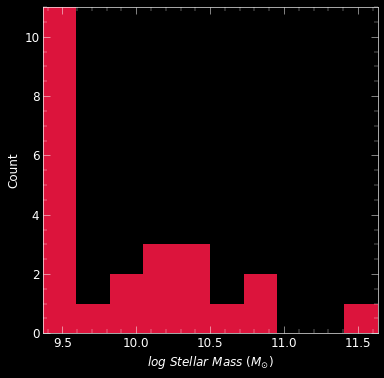

In [54]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'$log \ Stellar \ Mass \ (M_{\odot})$')
ax.set_ylabel(r'Count')
ax.hist(np.log10(galmass['mass']))
#ax.set_xlim()
#ax.set_ylim()

yt : [INFO     ] 2024-08-20 17:13:51,536 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-08-20 17:13:51,537 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2024-08-20 17:13:51,537 Parameters: domain_left_edge          = [-0.2 -0.2 -0.2]
yt : [INFO     ] 2024-08-20 17:13:51,538 Parameters: domain_right_edge         = [0.2 0.2 0.2]
yt : [INFO     ] 2024-08-20 17:13:51,539 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2024-08-20 17:13:51,544 Allocating for 7.327e+04 particles (index particle type 'all')
yt : [INFO     ] 2024-08-20 17:13:51,563 Identified 4.753e+03 octs
yt : [INFO     ] 2024-08-20 17:13:51,960 xlim = -0.200000 0.200000
yt : [INFO     ] 2024-08-20 17:13:51,961 ylim = -0.200000 0.200000
yt : [INFO     ] 2024-08-20 17:13:51,963 xlim = -0.200000 0.200000
yt : [INFO     ] 2024-08-20 17:13:51,964 ylim = -0.200000 0.200000
yt : [INFO     ] 2024-08-20 17:13:51,966 Splatting (('star', 'particle_mass')) onto a 800 by 800 mesh
yt : [I


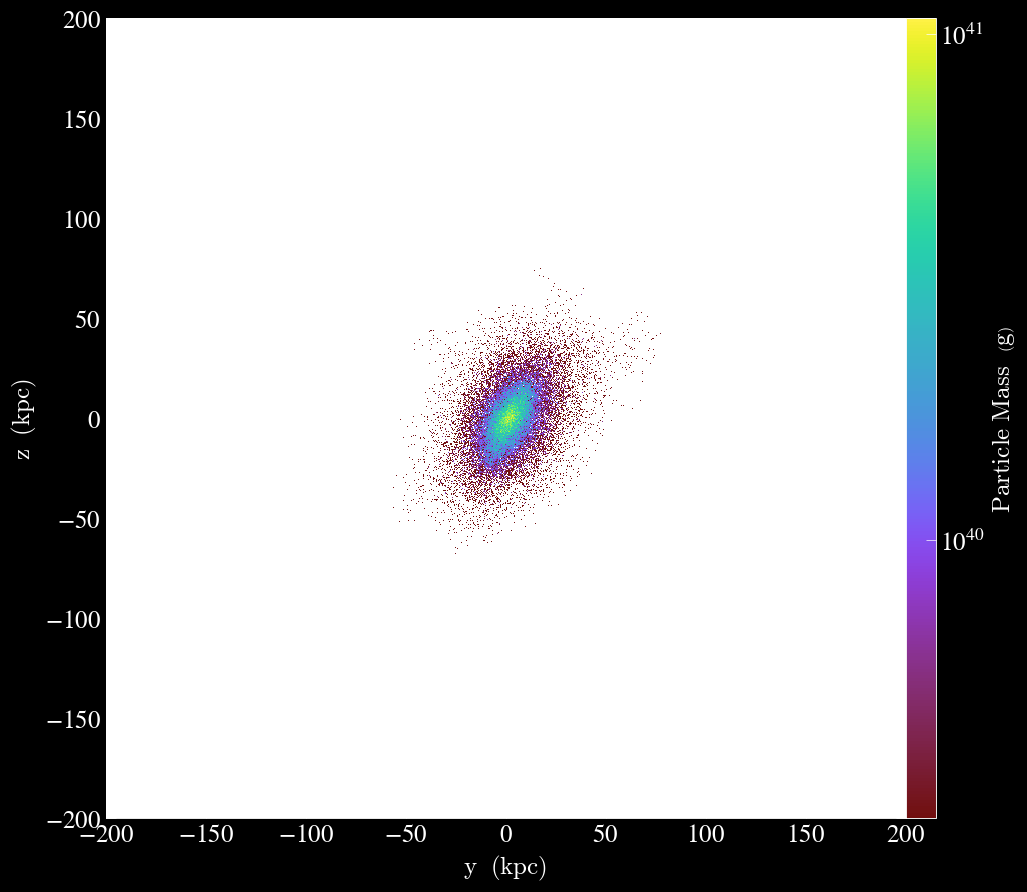

In [55]:
import yt 

galid = 1721222	

# galid = clus.bcgid
galdata = clus.get_alldat_gal(galid)

ds = galdata.get_yt_dataset()


prj = yt.ParticleProjectionPlot(ds,'x',("star","particle_mass"))

# prj.set_unit(("star","particle_mass"), "Msun")
prj.show()


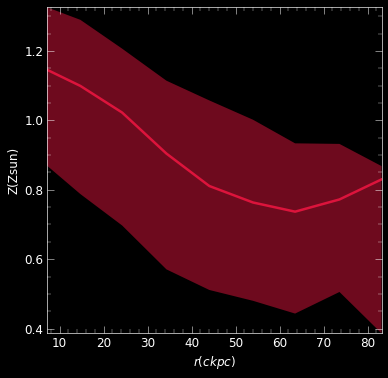

In [56]:
# We can also make simple profile plots of stellar metallicity 
# For example for BCG galaxy of this cluster we show below
import astropy.units as u

def Binned_histogram(data,propx,propy,maxr,binwidth):
    """
    This function returns the binned median and quartiles of the data
    """

    bins = np.arange(0,maxr,binwidth)#pd.cut(data[propx],nb,retbins=True, labels=False,duplicates='drop')
    labels = [int(i) for i in range(len(bins)-1)]
    data['binned'] = pd.cut(data[propx], bins,labels=labels,duplicates='drop')

    Q1 = []
    Q2 = []
    qua1 = []
    qua2 = []

    j=0
    for lab in labels:
        
        Q1.append(data.loc[data['binned']==lab,propx].median())
        Q2.append(data.loc[data['binned']==lab,propy].median())    

        # first and third quartile
        qua1.append(data.loc[data['binned']==lab,propy].quantile(0.25))
        qua2.append(data.loc[data['binned']==lab,propy].quantile(0.75))

        
    return Q1,Q2,qua1,qua2

# get the poisiton in COM frame of BCG galaxy
galdata = clus.get_alldat_gal(galid)
star_pos_gal = galdata.star_pos[:] - galdata.gal_pos
rgal_star = np.linalg.norm(star_pos_gal,axis=1)

# convert rgal_star to kpc
rgal_star = rgal_star*u.Mpc.to(u.kpc)

# Create a dataframe of pandas for analysis
gal_data = pd.DataFrame({'rcom':rgal_star,'star_z':galdata.star_z[:]/0.02})


q1,q2,Q1,Q2 = Binned_histogram(gal_data,'rcom','star_z',100,10)

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.set_xlabel(r'$r(ckpc)$')
ax.set_ylabel(r'Z(Zsun)')
ax.plot(q1,q2)
ax.fill_between(q1,Q1,Q2,alpha=0.5)


In [57]:
ds_all,ds_rest,ds_bcg,ds_icm = clus.save_yt_dataset(clus.clusID)


yt : [INFO     ] 2024-08-20 17:13:57,600 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-08-20 17:13:57,601 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2024-08-20 17:13:57,602 Parameters: domain_left_edge          = [-2. -2. -2.]
yt : [INFO     ] 2024-08-20 17:13:57,603 Parameters: domain_right_edge         = [2. 2. 2.]
yt : [INFO     ] 2024-08-20 17:13:57,604 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2024-08-20 17:13:57,608 Allocating for 3.110e+06 particles (index particle type 'all')
yt : [INFO     ] 2024-08-20 17:13:58,302 Identified 2.108e+05 octs
yt : [INFO     ] 2024-08-20 17:13:58,892 xlim = -2.000000 2.000000
yt : [INFO     ] 2024-08-20 17:13:58,893 ylim = -2.000000 2.000000
yt : [INFO     ] 2024-08-20 17:13:58,894 xlim = -2.000000 2.000000
yt : [INFO     ] 2024-08-20 17:13:58,895 ylim = -2.000000 2.000000
yt : [INFO     ] 2024-08-20 17:13:58,897 Splatting (('star', 'particle_mass')) onto a 800 by 800 mesh
yt : [INFO   

### Cluster COM

In [58]:

alldat = clus.get_alldat_gal(clus.get_galids())

allpos = []
allmass = []
for gal_obj in alldat:

    allpos.append(gal_obj.dm_pos[:])
    allmass.append(gal_obj.dm_mass[:])
    allpos.append(gal_obj.star_pos[:])
    allmass.append(gal_obj.star_mass[:])
    allpos.append(gal_obj.gas_pos[:])
    allmass.append(gal_obj.gas_mass[:])
    
# combine list of arays
all_pos = np.concatenate(allpos,axis=0)
all_mass = np.concatenate(allmass,axis=0)

# calculate center of mass by using all_mass and all_pos

cluster_com = np.median(all_pos,weights=all_mass,axis=0)

cluster_com

array([841.79108936, 510.88219046, 487.11958497])

In [59]:
bcg = clus.get_alldat_gal(clus.bcgid)

(bcg.gal_pos - bcg.clus_pos)*1000

array([ 7.60622897,  9.86374599, 11.91812827])

In [60]:
np.linalg.norm(bcg.gal_pos - bcg.clus_pos)*1000

17.239199095343242

### BCG COM

In [61]:
allpos = []
allmass = []
# allpos.append(bcg.dm_pos[:])
# allmass.append(bcg.dm_mass[:])
# allpos.append(bcg.star_pos[:])
# allmass.append(bcg.star_mass[:])
allpos.append(bcg.gas_pos[:])
allmass.append(bcg.gas_mass[:])

all_pos = np.concatenate(allpos,axis=0)
all_mass = np.concatenate(allmass,axis=0)

bcg_pos= np.median(all_pos,weights=all_mass,axis=0)

In [62]:
np.linalg.norm(bcg_pos - bcg.clus_pos)*1000

37.271862613449734

yt : [INFO     ] 2024-08-20 17:14:02,983 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-08-20 17:14:02,984 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2024-08-20 17:14:02,985 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2024-08-20 17:14:02,986 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-08-20 17:14:02,987 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2024-08-20 17:14:02,991 Allocating for 2.584e+06 particles (index particle type 'all')
yt : [INFO     ] 2024-08-20 17:14:03,191 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-08-20 17:14:03,192 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2024-08-20 17:14:03,193 Parameters: domain_left_edge          = [-1.2 -1.2 -1.2]
yt : [INFO     ] 2024-08-20 17:14:03,194 Parameters: domain_right_edge         = [1.2 1.2 1.2]
yt : [INFO     ] 2024-08-20 17:14:03,195 Parameters: cosmological_simulation   = 0.


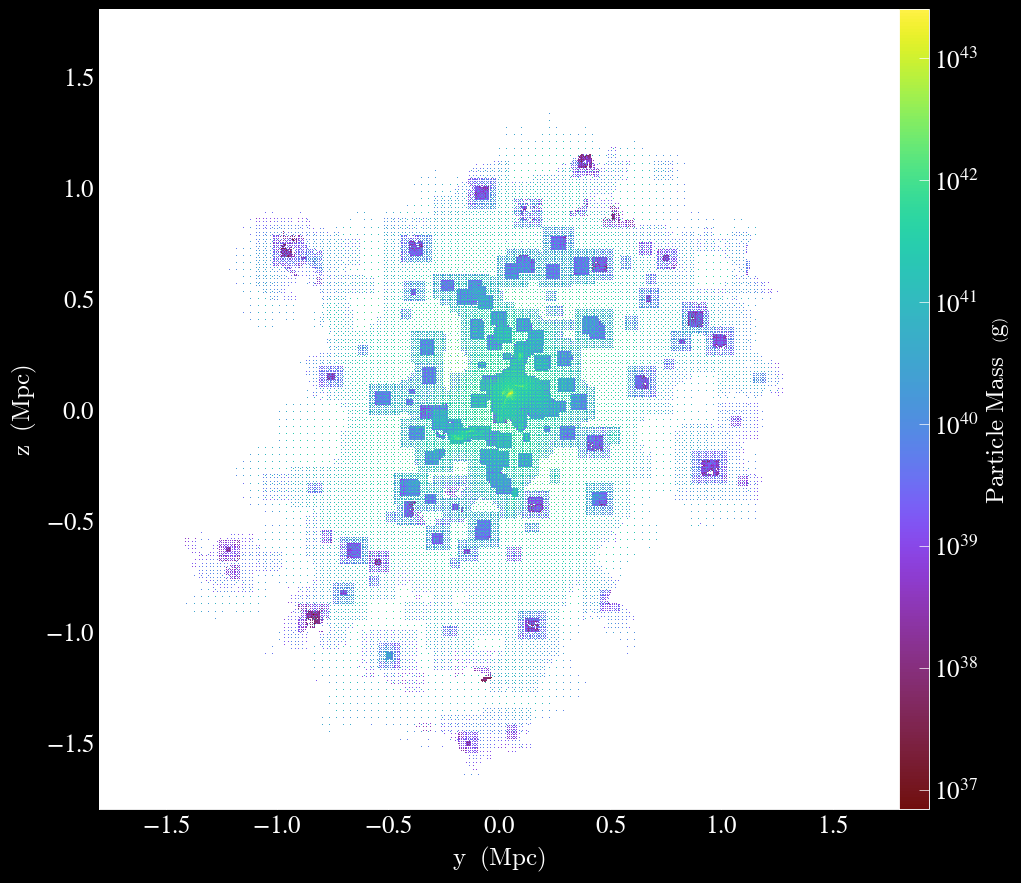

In [63]:
# import the modules
import HR5_cluster as hr5
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import yt 

plt.style.use('../paper_style.mplstyle')

clusid = 1664541
snapshot = 296
clus = hr5.Cluster(snapshot,clusid)

bcg = clus.get_alldat_gal(clus.bcgid)

ds = bcg.get_yt_dataset()

yt.ParticleProjectionPlot(ds,'x',("gas","particle_mass"))

In [64]:


# We can also make simple profile plots of stellar metallicity 
# For example for BCG galaxy of this cluster we show below
import astropy.units as u





-0.2202518604475358 -0.0732362939151997


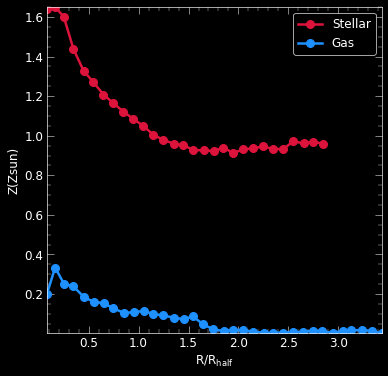

In [65]:
# import the modules
import HR5_cluster as hr5
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats

plt.style.use('../paper_style.mplstyle')

clusid = 1664541
snapshot = 296
clus = hr5.Cluster(snapshot,clusid)

# galid = 1721222	
galid = clus.bcgid
gal = clus.get_alldat_gal(galid)

R_s,Z_s,slope_s,std_e_s = gal.get_metal_slope(r_rhalf_max=3,r_bin_width=0.1,var='star')

R_g,Z_g,slope_g,std_e_g = gal.get_metal_slope(r_rhalf_max=4,r_bin_width=0.1,var='gas')

# fit a line and get the slope

# # Fit a line to the data using scipy's linregress
# slope, intercept, r_value, p_value, std_err = stats.linregress(R, Z)

# # Print the results
# print(f"Slope: {slope}")
# print(f"Intercept: {intercept}")
# print(f"R-squared: {r_value**2}")
print(slope_s,slope_g)

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.set_xlabel(r'$\mathrm{R/R_{\mathrm{half}}}$')
ax.set_ylabel(r'Z(Zsun)')

ax.plot(R_s,Z_s,marker='o',markersize=8,label='Stellar')
ax.plot(R_g,Z_g,marker='o',markersize=8,label='Gas')

ax.legend()

plt.show()

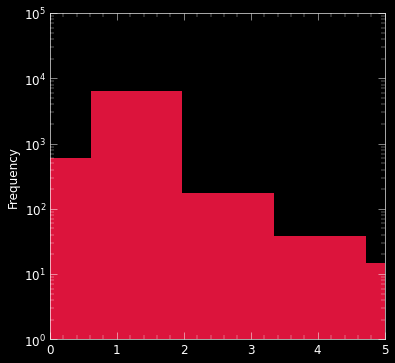

In [77]:
morpho = pd.read_csv('../Data/morphology.csv')


fig,ax = plt.subplots(1,1,figsize=(6,6))
morpho.sersicn.plot(ax=ax,kind='hist',bins=50,xlim=(0,5))

ax.set_yscale('log')
ax.set_ylim(1,1e5)
plt.show()

## Z_star and Z_gas analysis

### Plot median Metal profile

100%|██████████| 136/136 [00:50<00:00,  2.67it/s]


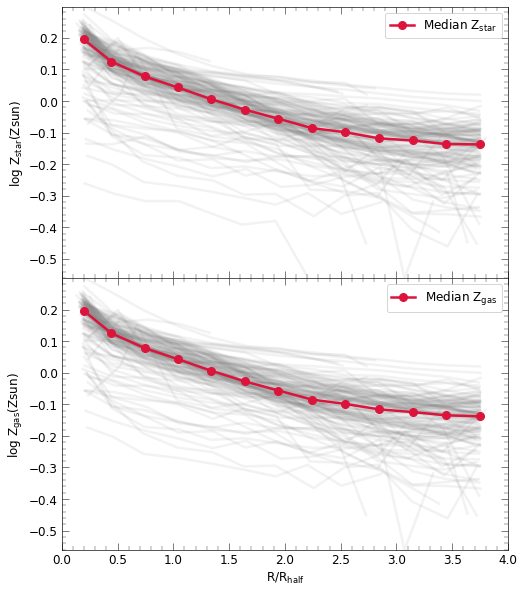

In [2]:
import pandas as pd
import HR5_cluster as hr5

# get only elliptical galaxies

morpho = pd.read_csv('../Data/morphology.csv')

e_galaxies = morpho[morpho['sersicn']>2.5]

# clusid = 1664541
snapshot = 296

Ana = hr5.Analysis(snapshot)

Ana_df = Ana.get_slope_data(galids=e_galaxies.ID,clusids=e_galaxies.clusID,rmax=4,rbin_width=0.3,var='met',dump='True',plot='True')



## Fe/H analysis

### Plot feh medain profile

In [9]:
import pandas as pd
import HR5_cluster as hr5

# get only elliptical galaxies

morpho = pd.read_csv('../Data/morphology.csv')

e_galaxies = morpho[morpho['sersicn']>2.5]

# clusid = 1664541
snapshot = 296

Ana = hr5.Analysis(snapshot)

Ana.get_slope_data(galids=e_galaxies.ID,clusids=e_galaxies.clusID,rmax=4,rbin_width=0.3,var='feh',dump='False')



  0%|          | 0/136 [00:00<?, ?it/s]

100%|██████████| 136/136 [00:00<00:00, 1399.73it/s]


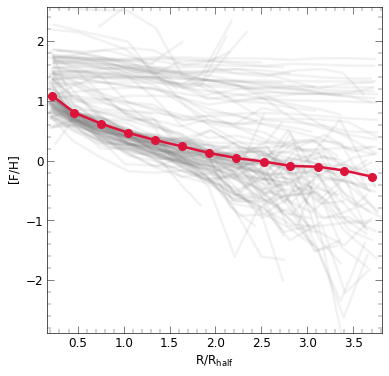

In [10]:
Ana.plot_slope('feh')